# Quantitative Trading: Feature Engineering with Python

In [ ]:
# Most of the packages we will import below are probably already installed in your Python environment. 
# The new packages we will introduce today will have to be installed (once):

#!pip install TA-Lib
#!pip install ta
#!pip install mplfinance

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import mplfinance as mpf   # make sure to install this new library using:   !pip install TA-Lib
import talib as t          # make sure to install this new library using:   !pip install TA-Lib
import ta as ta            # make sure to install this new library using:   !pip install ta

## Feature engineering

Feature engineering is the process of selecting, extracting, and transforming features (i.e., variables or attributes) from raw data that are relevant and useful for a particular machine learning task. The goal of feature engineering is to create a set of features that can help a machine learning algorithm to learn patterns and relationships in the data and make accurate predictions.In our context we are gonna use pythons ta(Technical analysis) library to generate 50 different features for our model.

### Load and pre-process data

The data contains hourly Bitcoin data.

In [39]:
# Load data
df = pd.read_csv("./data/datas.csv", sep=",")
df

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1315918800,5.800000e+00,6.000000e+00,5.800000e+00,6.000000e+00,2.500000e+01,1.491900e+02,5.967600e+00
1,1315922400,5.950000e+00,5.950000e+00,5.760000e+00,5.760000e+00,2.235398e+01,1.320410e+02,5.906823e+00
2,1315926000,5.650000e+00,5.650000e+00,5.650000e+00,5.650000e+00,2.542000e+00,1.436230e+01,5.650000e+00
3,1315929600,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308
4,1315933200,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308,1.700000e+308
...,...,...,...,...,...,...,...,...
52052,1503388800,3.794550e+03,3.807230e+03,3.753580e+03,3.795250e+03,8.401506e+02,3.179789e+06,3.784785e+03
52053,1503392400,3.795250e+03,3.927000e+03,3.795250e+03,3.922850e+03,1.509122e+03,5.853718e+06,3.878889e+03
52054,1503396000,3.906740e+03,3.922890e+03,3.864630e+03,3.879040e+03,4.930284e+02,1.915458e+06,3.885086e+03
52055,1503399600,3.868520e+03,3.903370e+03,3.868520e+03,3.899000e+03,3.815390e+02,1.485393e+06,3.893162e+03


In [41]:
# Assuming your dataframe is called 'df'
# Convert 'timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set 'timestamp' as the DataFrame index
df.set_index('Timestamp', inplace=True)

In [43]:
# Check the new dataset: Now 'Timestamp' is your index
df.tail(8)

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Timestamp,,,,,,,
2017-08-22 05:00:00,3645.98,3769.44,3600.00,3750.59,2068.600090,7.665746e+06,3705.765306
2017-08-22 06:00:00,3750.59,3845.40,3750.59,3799.79,1372.852440,5.229568e+06,3809.271988
2017-08-22 07:00:00,3799.77,3806.00,3750.69,3797.00,1171.214298,4.424449e+06,3777.659867
2017-08-22 08:00:00,3794.55,3807.23,3753.58,3795.25,840.150643,3.179789e+06,3784.784933
2017-08-22 09:00:00,3795.25,3927.00,3795.25,3922.85,1509.122162,5.853718e+06,3878.889320
2017-08-22 10:00:00,3906.74,3922.89,3864.63,3879.04,493.028379,1.915458e+06,3885.086491
2017-08-22 11:00:00,3868.52,3903.37,3868.52,3899.00,381.538996,1.485393e+06,3893.162303
2017-08-22 12:00:00,3896.18,3951.83,3885.09,3934.21,350.955561,1.376127e+06,3921.085962


In [45]:
# Rename some of the columns and drop redundant ones:
df = df.rename(columns={'Volume_BTC': 'Volume'})
df = df.drop(columns=['Volume_Currency', 'Weighted_Price'])
df.tail(8)

,Open,High,Low,Close,Volume
Timestamp,,,,,
2017-08-22 05:00:00,3645.98,3769.44,3600.00,3750.59,2068.600090
2017-08-22 06:00:00,3750.59,3845.40,3750.59,3799.79,1372.852440
2017-08-22 07:00:00,3799.77,3806.00,3750.69,3797.00,1171.214298
2017-08-22 08:00:00,3794.55,3807.23,3753.58,3795.25,840.150643
2017-08-22 09:00:00,3795.25,3927.00,3795.25,3922.85,1509.122162
2017-08-22 10:00:00,3906.74,3922.89,3864.63,3879.04,493.028379
2017-08-22 11:00:00,3868.52,3903.37,3868.52,3899.00,381.538996
2017-08-22 12:00:00,3896.18,3951.83,3885.09,3934.21,350.955561


**Why bother with renaming and dropping some columns?**

Most packages follow convention and OHLC or OHLCV datasets operate on the assumption that your supplied data has these data columns. Some more robust than others and may check if your data has capitalized or lowercased column names, e.g., High vs high, other packages won't. So it is important to follow convention to minimize potential errors when using external packages:

*Make sure your DataFrame has the correct format:*
1. Index must be datetime
2. Column names must be: Open, High, Low, Close, Volume

Recall that the YahooFinance data from `yfinance` package conveniently comes in the same format.

In [48]:
# Clean nan values
df = ta.utils.dropna(df)
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


## Plot financial data

In [51]:
def plot_ohlcv(df):
    """
    Plot OHLCV data using mplfinance.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with columns: Open, High, Low, Close, Volume
        Index must be datetime
    
    # Make sure your DataFrame has the correct format:
    # 1. Index must be datetime
    # 2. Column names must be: Open, High, Low, Close, Volume

    # If your DataFrame isn't properly formatted, you can fix it like this:
    df.index = pd.to_datetime(df.index)
    df.columns = df.columns.str.title()  # Capitalize first letter

    Example usage:
    plot_ohlcv(df)
    """
    # Set the style
    mc = mpf.make_marketcolors(up='g', down='r',
                              edge='inherit',
                              wick='inherit',
                              volume='in',
                              ohlc='inherit')
    
    style = mpf.make_mpf_style(base_mpf_style='charles', 
                              gridstyle='',
                              y_on_right=True,
                              marketcolors=mc)
    
    # Create the plot
    mpf.plot(df,
            type='candle',           # 'line' or 'candle' Use candlesticks
            style=style,             # Use our style
            title='OHLCV Chart',
            ylabel='Price',
            ylabel_lower='Volume',
            volume=True,            # Show volume
            mav=(20,),              # Add 20-period Moving Average
            figsize=(14,8),         # Set figure size
            panel_ratios=(3,1))     # Ratio between price and volume panels


/home/c47e0470-b83d-48c6-a026-413daab4c753/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


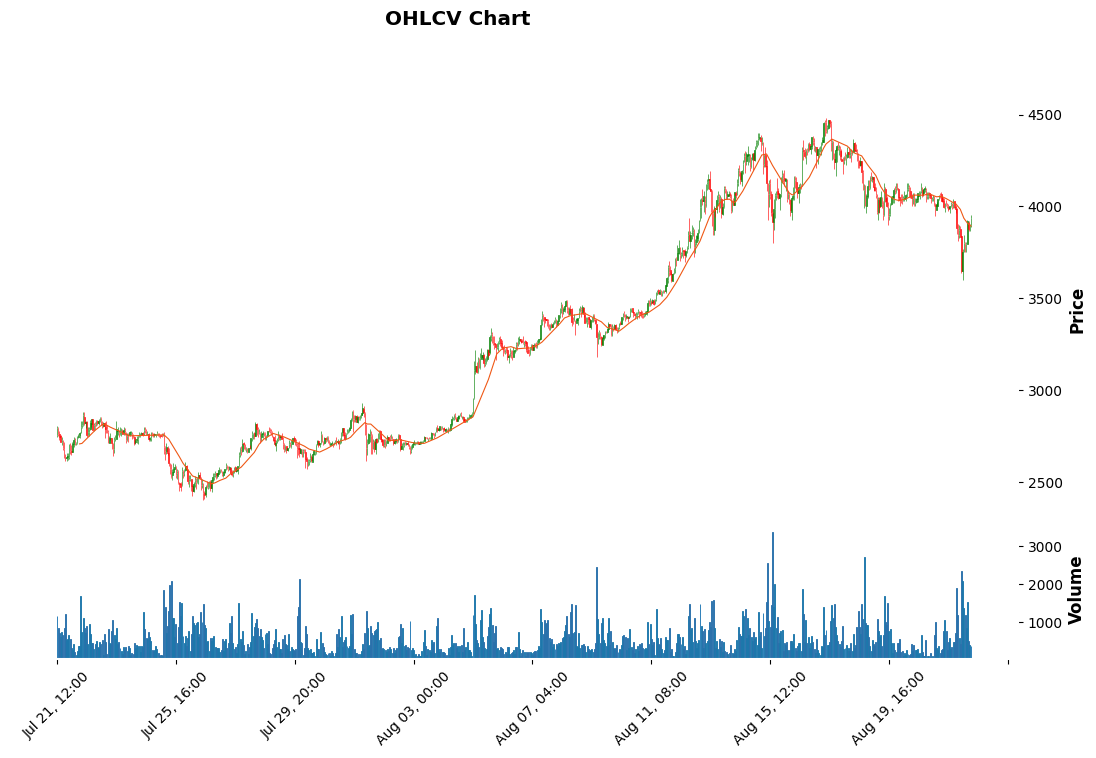

In [53]:
plot_ohlcv(df.loc['2017-07-21 12:00:00':'2017-08-22 12:00:00'])

In [55]:
# Alternative version with more customization:
def plot_ohlcv_advanced(df, mas=(20,50,100), title='OHLCV Chart'):
    """
    Enhanced OHLCV plot with multiple moving averages and customization.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data
    mas : tuple
        Moving average periods to plot
    title : str
        Chart title

    Format DataFrame if needed
    df.index = pd.to_datetime(df.index)
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

    # Plot with multiple moving averages
    plot_ohlcv_advanced(df, mas=(20,50,200), title='Bitcoin OHLCV')
    """

    # Define colors and style
    mc = mpf.make_marketcolors(up='g',down='r',
                              edge='inherit',
                              wick='inherit',
                              volume='in',
                              ohlc='inherit')
    
    style = mpf.make_mpf_style(marketcolors=mc,
                              gridstyle=':',
                              y_on_right=True)
    
    # Add moving averages
    addplot = []
    colors = ['blue', 'orange', 'purple']  # Colors for different MAs
    
    for i, ma in enumerate(mas):
        ma_data = df['Close'].rolling(window=ma).mean()
        addplot.append(
            mpf.make_addplot(ma_data, 
                            color=colors[i % len(colors)], 
                            width=0.8,
                            label=f'MA{ma}')
        )
    
    # Create the plot
    fig, axes = mpf.plot(df,
                        type='candle',
                        style=style,
                        title=title,
                        ylabel='Price',
                        ylabel_lower='Volume',
                        volume=True,
                        addplot=addplot,
                        figsize=(12,8),
                        panel_ratios=(3,1),
                        show_nontrading=False,
                        tight_layout=True,
                        returnfig=True)        # Changed to True to add legend
    
    # Add legend
    axes[0].legend()
    
    return fig, axes

/home/c47e0470-b83d-48c6-a026-413daab4c753/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


(<Figure size 1200x800 with 4 Axes>,
 [<Axes: ylabel='Price'>, <Axes: >, <Axes: ylabel='Volume'>, <Axes: >])

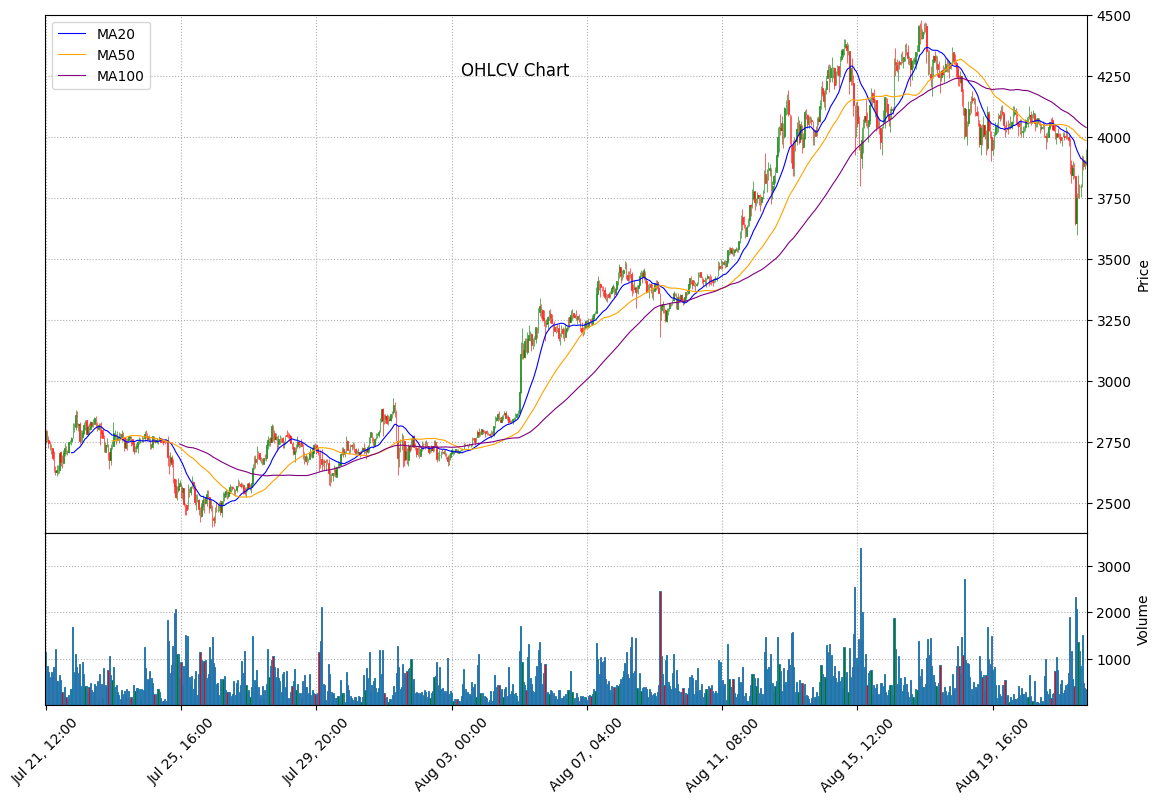

In [57]:
plot_ohlcv_advanced(df.loc['2017-07-21 12:00:00':'2017-08-22 12:00:00'])

## Create additional features

We will create additional data columns using underlying OHCLV data and some of the well-known technical analysis indicators. The TA (technical analysis) library contains more than 50 technical indicators and indices. Luckily, you can construct them all **in bulk** by using `add_all_ta_features` function, or you can focus on all indicators but within a specific category:- `add_momentum_ta`
- `add_others_ta`
- `add_trend_ta`
- `add_volatility_ta`
- `add_volume_ta`,

In [59]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True
)

/home/c47e0470-b83d-48c6-a026-413daab4c753/.local/lib/python3.10/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [61]:
print(df.columns)
print(len(df.columns))

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

In [75]:
df.head(5)

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-09-13 13:00:00,5.80,6.00,5.80,6.00,25.000000,25.000000,25.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
2011-09-13 14:00:00,5.95,5.95,5.76,5.76,22.353982,2.646018,2.646018,0.055877,-5.364956,-38248.218392,...,-0.320037,-0.064007,-0.256029,-0.850985,-0.170197,-0.680788,5.907002,-4.000000,-4.082199,-4.000000
2011-09-13 15:00:00,5.65,5.65,5.65,5.65,2.542000,2.646018,0.104018,0.053031,-4.638479,-0.000000,...,-0.716762,-0.194558,-0.522204,-8.440915,-1.824341,-6.616575,5.802219,-1.909722,-1.928193,-5.833333
2011-09-13 19:00:00,5.92,5.97,5.92,5.97,8.475400,11.121418,8.579418,0.190529,-3.588392,174033.083984,...,-0.589814,-0.273610,-0.316205,-12.800761,-4.019625,-8.781136,5.872230,5.663717,5.509138,-0.500000
2011-09-14 07:00:00,5.58,5.62,5.54,5.62,16.425700,27.547117,-7.846282,0.368291,-3.897050,-177770.205687,...,-0.956319,-0.410151,-0.546168,-13.119353,-5.839570,-7.279783,5.767120,-5.862647,-6.041526,-6.333333


As you can see, now you have 86 additional features on top of your original data of Open, High, Low, Close, and Volume.

Some of these features might be very close to others (almost identical). So, let us check their correlations.

### Quick Example: Plot RSI

Note: Because we use hourly data, the number of points (hours on 24-hour scale) from 2011 to 2017 is too great and prevent seeing the plots in detail.

Feel free to adjust the time range.

<Axes: xlabel='Timestamp'>

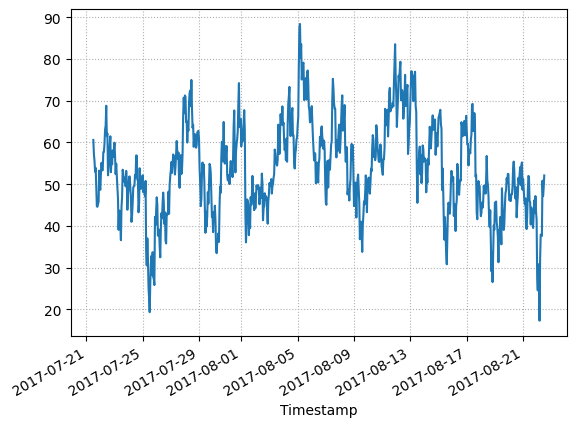

In [124]:
df.loc['2017-07-21 12:00:00':'2017-08-22 12:00:00'].momentum_rsi.plot()

### Quick Example: Plot Bollinger Bands

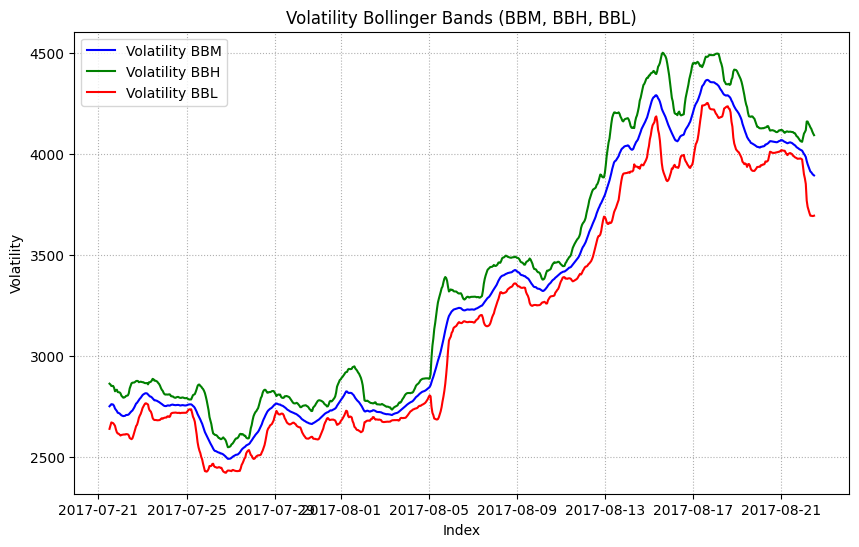

In [126]:
plt.figure(figsize=(10, 6))

# Plot each column with different labels and colors
plt.plot(df.loc['2017-07-21 12:00:00':'2017-08-22 12:00:00'].volatility_bbm, label='Volatility BBM', color='blue')
plt.plot(df.loc['2017-07-21 12:00:00':'2017-08-22 12:00:00'].volatility_bbh, label='Volatility BBH', color='green')
plt.plot(df.loc['2017-07-21 12:00:00':'2017-08-22 12:00:00'].volatility_bbl, label='Volatility BBL', color='red')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.title('Volatility Bollinger Bands (BBM, BBH, BBL)')
plt.legend()

# Show the plot
plt.show()

## Check correlation among features

In [65]:
def plot_correlation_heatmap(df, figsize=(12, 10), mask_upper=True, tick_fontsize=8):
    """
    Create an improved correlation heatmap with better visibility.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    figsize : tuple
        Figure size (width, height)
    mask_upper : bool
        If True, mask the upper triangle of the heatmap
    tick_fontsize : int
        Font size for tick labels on both axes
    """
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Create mask for upper triangle
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(corr_matrix), k=0)
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=False,                # Show numbers
                fmt='.2f',                  # Format numbers to 2 decimal places
                cmap=cmap,
                center=0,                   # Center colormap at 0
                square=True,                # Force square shape
                linewidths=0.5,             # Add grid lines
                cbar_kws={'shrink': .5},    # Adjust colorbar size
                annot_kws={'size': 8},      # Adjust font size of numbers
                xticklabels=corr_matrix.columns,
                yticklabels=corr_matrix.columns,
                ax=ax)
    
    # Adjust tick label sizes
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    # Rotate x-axis labels
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout and title
    plt.title('Correlation Matrix Heatmap', pad=20)
    plt.tight_layout()
    
    return

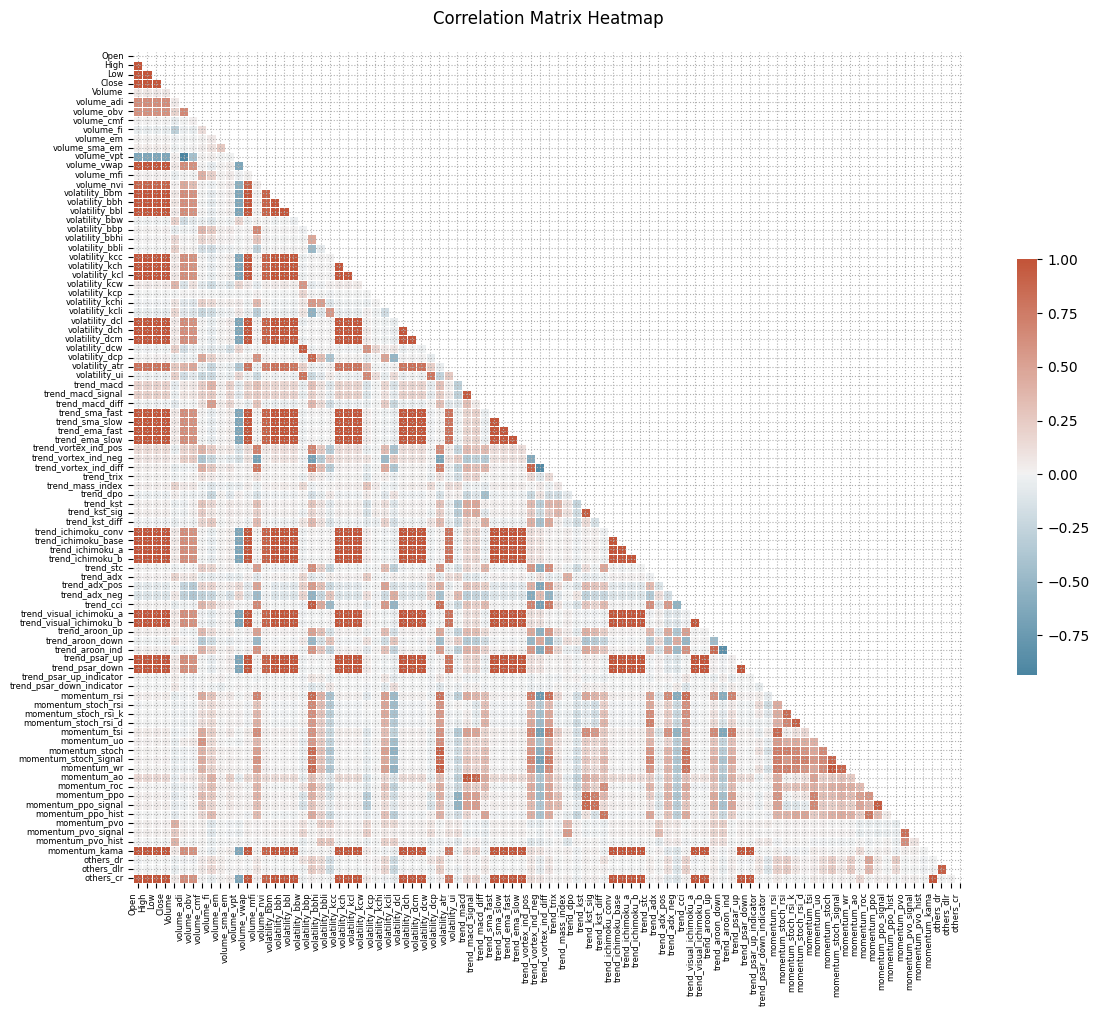

In [67]:
plot_correlation_heatmap(df, tick_fontsize=6)

The function below is a slight modification, allowing your to group items in the correlation matrix:

In [83]:
# Alternative version with feature clustering
def plot_clustered_correlations(df, figsize=(12, 10), tick_fontsize=8, mask_upper=True):
    """
    Create a correlation heatmap with clustered features.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    figsize : tuple
        Figure size (width, height)
    tick_fontsize : int
        Font size for tick labels on both axes
    mask_upper : bool
        If True, mask the upper triangle of the heatmap
    """
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Convert correlations to distances
    dissimilarity = 1 - abs(corr_matrix)
    
    # Perform hierarchical clustering
    links = scipy.cluster.hierarchy.linkage(dissimilarity, method='complete')
    order = scipy.cluster.hierarchy.dendrogram(links, no_plot=True)['leaves']
    
    # Reorder correlation matrix
    corr_matrix = corr_matrix.iloc[order, order]
    
    # Create mask for upper triangle if requested
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(corr_matrix), k=0)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Create heatmap with clustered features
    sns.heatmap(corr_matrix,
                mask=mask,
                annot=False,
                fmt='.2f',
                cmap=cmap,
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'shrink': .5},
                annot_kws={'size': tick_fontsize},
                xticklabels=corr_matrix.columns,
                yticklabels=corr_matrix.columns,
                ax=ax)
    
    # Adjust tick label sizes
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    # Rotate labels
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout and title
    plt.title('Clustered Correlation Matrix Heatmap', pad=20)
    plt.tight_layout()
    
    return

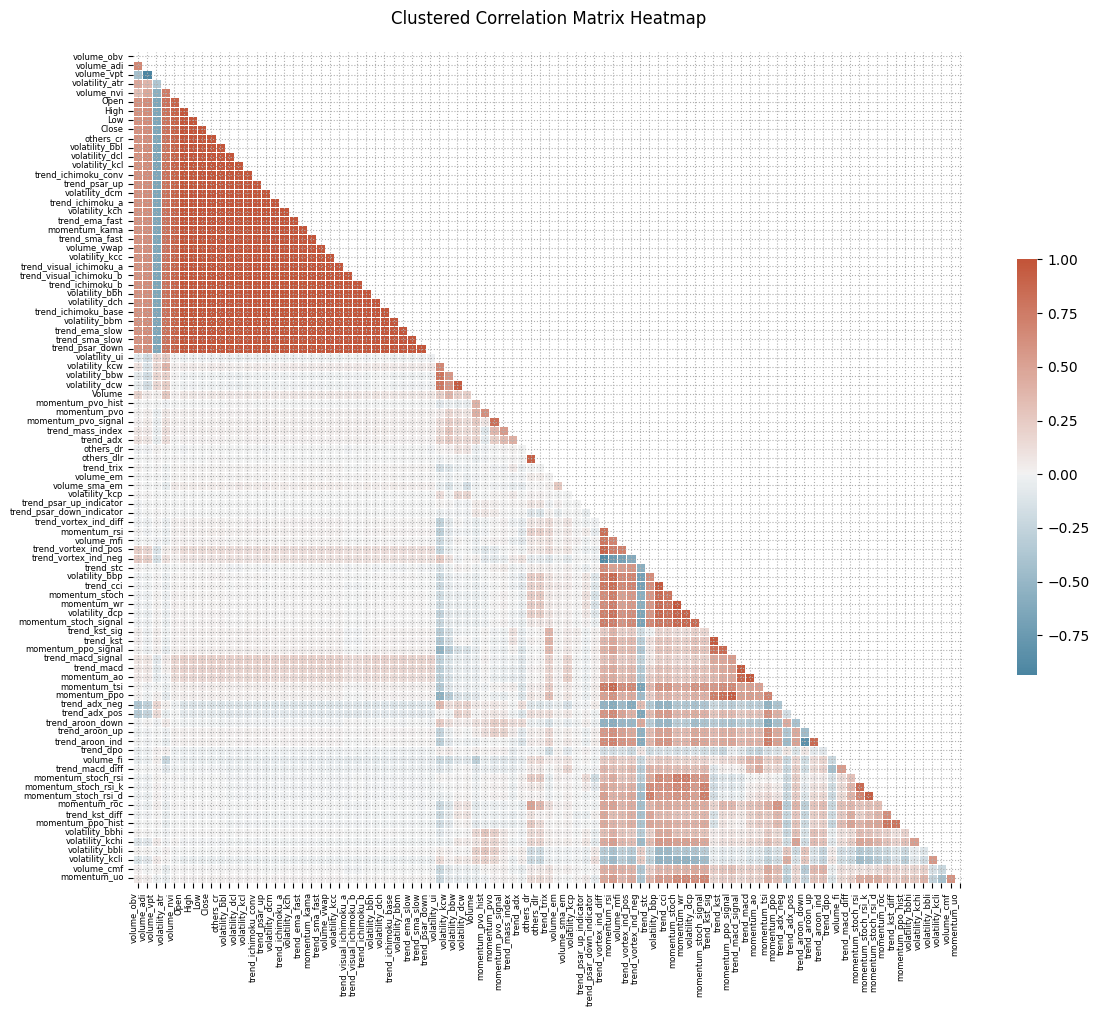

In [85]:
plot_clustered_correlations(df, tick_fontsize=6, mask_upper=True)

There is usually no good reason for keeping features that are highly correlated (either close to +1 or to -1) because they contain similar information signals. We can set an arbitrary threshold and retain features that are less correlated with the rest, weeding out identical or close to identical or, simply, highly correlated features. 

The choice of the threshold is arbitrary, but, generally, two features with correlation above 60% are considered highly correlated.

In [88]:
def drop_correlated_features(data, threshold):
    """
    Remove features that have a correlation coefficient higher than the threshold.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The input DataFrame containing the features
    threshold : float
        The correlation threshold above which features will be dropped
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with correlated features removed
    """
    # Calculate the correlation matrix
    corr_matrix = data.corr().abs()
    
    # Create a mask for the upper triangle of the correlation matrix
    # Using bool instead of np.bool which is deprecated
    upper = np.triu(np.ones(corr_matrix.shape), k=1)
    upper_mask = corr_matrix.where(upper.astype(bool))
    
    # Find features with a correlation above the threshold
    to_drop = [column for column in upper_mask.columns if any(upper_mask[column] > threshold)]
    
    # Drop the correlated features and return a copy to avoid modifying the original
    return data.drop(columns=to_drop, axis=1)

In [94]:
df2=drop_correlated_features(df,0.6)

/tmp/ipykernel_336/1898444795.py:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  links = scipy.cluster.hierarchy.linkage(dissimilarity, method='complete')


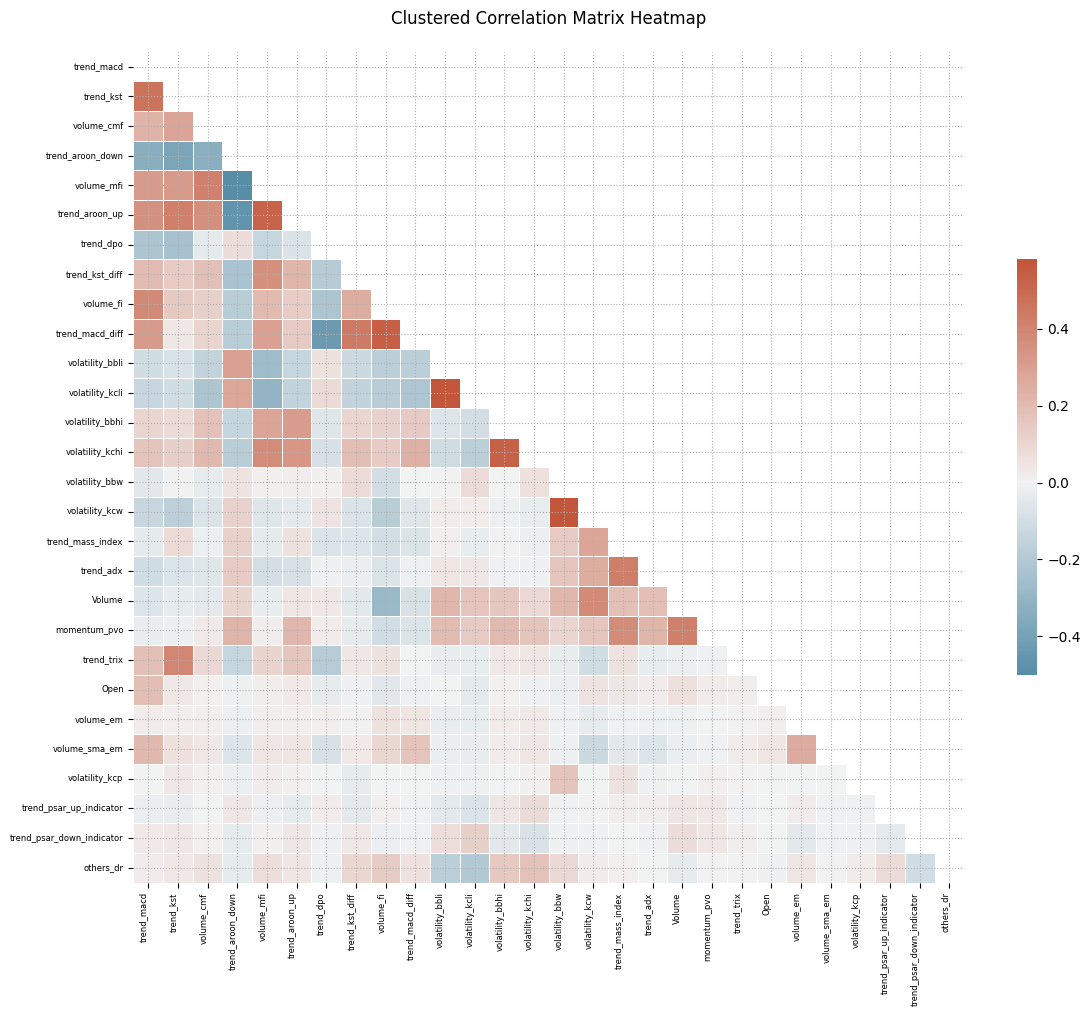

In [96]:
plot_clustered_correlations(df2, tick_fontsize=6, mask_upper=True)

## Key Takeways: 

- There are many technical indicators and indexes. Using all of them may not always be wise.
- By reducing the feature set to only those indicators that exhibit minimal correlation, we have retained features that are more likely to contain unique, non-redundant information, maximizing the potential signal.
- This process helps to eliminate noise and redundancy, ensuring that the remaining features represent distinct market behaviors or trends.
- These refined features can now serve as inputs for machine learning models, offering a more robust foundation for further analysis, the development of predictive models, and the optimization of trading strategies.
- By reducing feature overlap, we enhance the model's capacity to detect meaningful patterns and generate actionable insights.